# Zustandsraum - Dreitank

LV Elektronische Steuerungs- und Regelungssysteme SS2020 (Master ETuIT, HSM, (c) Christoph Menz) 

***

In diesem Notebook wird eine mögliche Musterlösung des 3-Tank-Problem aufgezeigt. 

(Setzt Installation der Python Control Systems Library voraus - vgl. Notebook Zustandsregler - Teil 1)

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import control as ctrl

***

### Modellbildung

Ziel ist es, ein (stark vereinfachtes, lineares) Modell des 3-Tank-Systems in Zustandsraumdarstellung zu entwickeln.

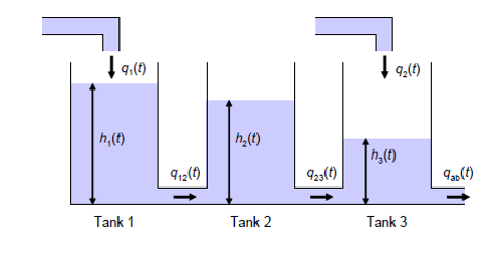

In [2]:
image = mpimg.imread("Dreitank.png")
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.axis('off')
plt.show()

Nehmen wir an, dass die Durchflüsse zwischen den Tanks proportional zur Füllstandsdifferenz der jeweils benachbarten Tanks sind (wir verzichten auf weitere Parameter, wie Durchmesser, Massen, Dichten, ... etc):

$
q_{12} = h_1 - h_2 \\
q_{23} = h_2 - h_3 \\
q_{ab} = h_3 \\
$

Die Füllstände ergeben sich aus den zeitlich integrierten Flüssen:

$
h_1 = \int q_1 - q_{12} \\
h_2 = \int q_{12} - q_{23} \\
h_3 = \int q_{23} + q_2 - q_{ab}
$

Ableiten und einsetzen ergibt dann:

$
\dot{h}_1 = q_1 - h_1 + h_2 \\
\dot{h}_2 = h_1 - 2 h_2 + h_3 \\
\dot{h}_3 = h_2 - 2 h_3 + q_2 
$

Mit den Zustandsgrößen $h_1,h_2,h_3$, den Eingangsgrößen $q_1,q_2$ ergibt sich das ZR-Modell

$
\dot{\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} 
$

$
\dot{\mathbf{x}} =
\begin{bmatrix}
-1 & 1 & 0 \\
1  & -2 & 1 \\
0 & 1 & -2
\end{bmatrix}
\mathbf{x}
+
\begin{bmatrix}
1 & 0  \\
0  & 0 \\
0 & 1 
\end{bmatrix}
\mathbf{u}
$


#### Simulation

In [3]:
# System
A = [[-1.,1.,0.],[0,-2,1],[0,1,-2]]
B = [[1,0],[0,0],[0,1]]
C = [[1,0,0],[0,1,0],[0,0,1]]
D = [[0,0],[0,0],[0,0]]

# Erzeugung eines ZR-Modells mit der Control Systemes Library
sys = ctrl.ss(A,B,C,D)

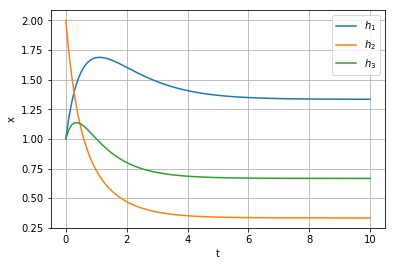

In [4]:
# Simulationsparameter
dt = 0.1 
tend = 10
t = np.arange(0,tend+dt,dt)

# Anfangszustand
x0 = [[1],[2],[1]]

# Eingangsgrößen 
u = np.zeros([2,len(t)])
u[0,:] = 1
u[1,:] = 1

# Simulation
t, y, x= ctrl.forced_response(sys,T=t,U=u,X0=x0,return_x=True)

plt.plot(t, x[0])
plt.plot(t, x[1])
plt.plot(t, x[2])
plt.grid()
plt.xlabel('t')
plt.ylabel('x')
plt.legend(['$h_1$','$h_2$','$h_3$'])
plt.show()

In [5]:
u

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])